## Reproducability
- table 1

In [1]:
import numpy as np
import scipy.stats as stats

# Define the data from Table 1 and Table 2
table1_data = np.array([
    [0.888, 0.701, 0.770, 0.612, 0.963, 0.821],
    [0.777, 0.520, 0.741, 0.588, 0.947, 0.736],
    [0.871, 0.680, 0.768, 0.610, 0.962, 0.801]
])

table2_data = np.array([
    [0.890, 0.703, 0.772, 0.614, 0.965, 0.823],
    [0.773, 0.471, 0.743, 0.580, 0.953, 0.738],
    [0.880, 0.685, 0.742, 0.587, 0.956, 0.803]
])

# Number of rows (models) and columns (datasets)
num_rows, num_cols = table1_data.shape

# Initialize lists to store t-statistics and p-values
t_statistics = []
p_values = []

# Perform paired t-tests for each row (model)
for row in range(num_rows):
    t_stat, p_value = stats.ttest_rel(table1_data[row], table2_data[row])
    t_statistics.append(t_stat)
    p_values.append(p_value)

# Print the results
for row in range(num_rows):
    print(f"Model {row+1}:")
    print(f"  t-statistic: {t_statistics[row]}")
    print(f"  p-value: {p_values[row]}")
    if p_values[row] < 0.05:
        print("  There is a significant difference.")
    else:
        print("  There is no significant difference.")
    print()


Model 1:
  t-statistic: -inf
  p-value: 0.0
  There is a significant difference.

Model 2:
  t-statistic: 1.018006658513309
  p-value: 0.35537715248733737
  There is no significant difference.

Model 3:
  t-statistic: 1.0746615719868462
  p-value: 0.3316276331908544
  There is no significant difference.



/Users/gast/anaconda3/envs/dl2023/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


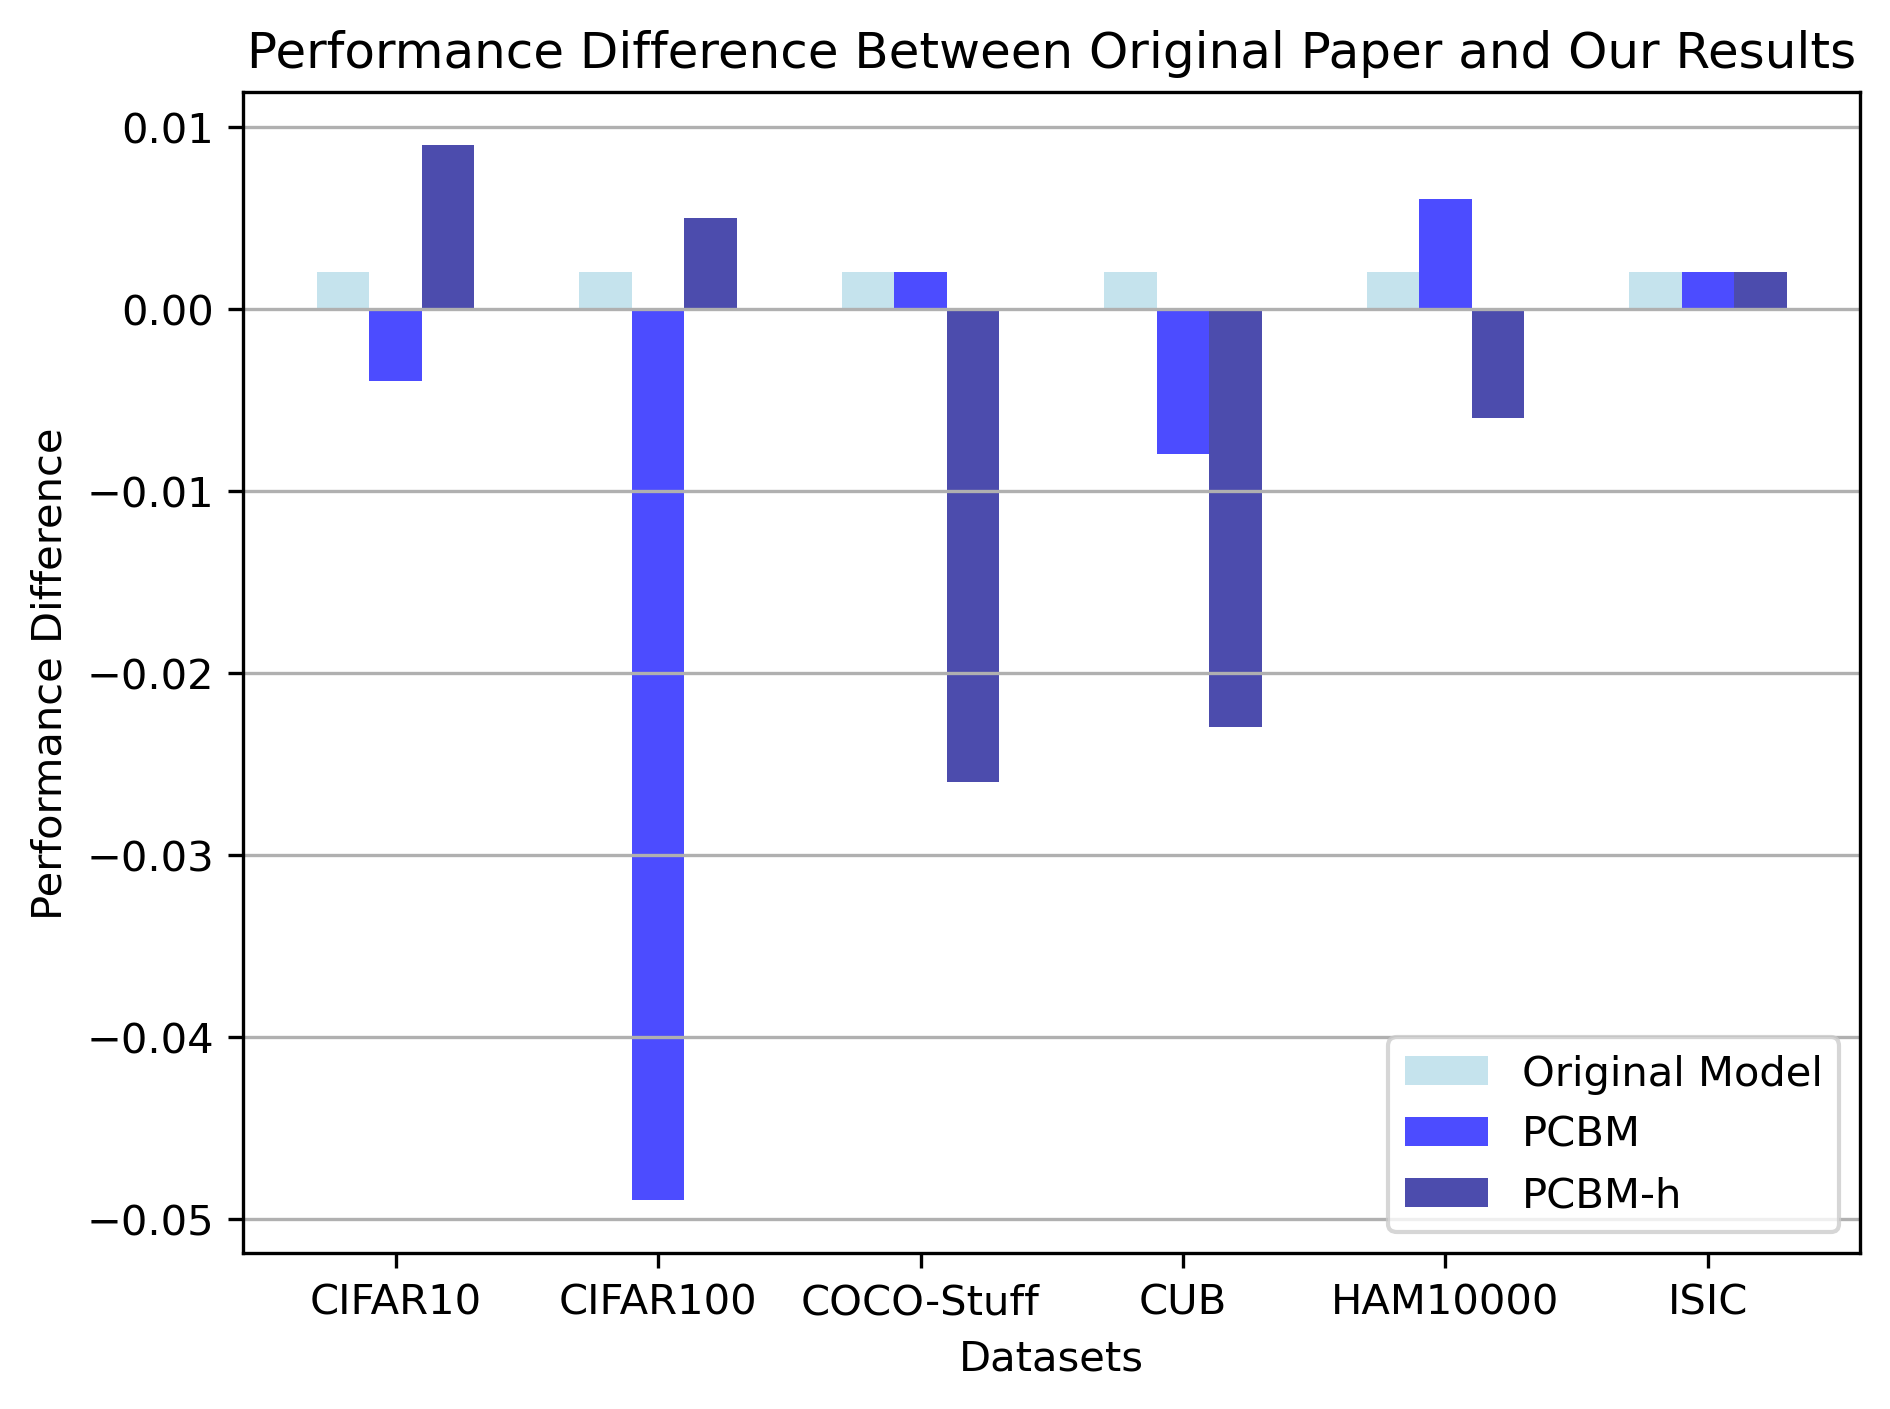

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance_difference():
    # Data from Table 1 (Original Model)
    original_model_table1 = np.array([0.890, 0.703, 0.772, 0.614, 0.965, 0.823]) 

    # Data from Table 2 (Original Model)
    original_model_table2 = np.array([0.888, 0.701, 0.770, 0.612, 0.963, 0.821])

    # Data from Table 1 (PCBM)
    pcbm_table1 = np.array([0.773, 0.471, 0.743, 0.580, 0.953, 0.738]) 

    # Data from Table 2 (PCBM)
    pcbm_table2 = np.array([0.777, 0.520, 0.741, 0.588, 0.947, 0.736])

    # Data from Table 1 (PCBM-h)
    pcbm_h_table1 = np.array([0.880, 0.685, 0.742, 0.587, 0.956, 0.803])

    # Data from Table 2 (PCBM-h)
    pcbm_h_table2 = np.array([0.871, 0.680, 0.768, 0.610, 0.962, 0.801]) 

    # Dataset labels
    datasets = ['CIFAR10', 'CIFAR100', 'COCO-Stuff', 'CUB', 'HAM10000', 'ISIC']

    # Bar width
    bar_width = 0.2

    # X-axis values for the bars
    x = np.arange(len(datasets))

    # Increase DPI to 300
    plt.figure(dpi=300)

    # Plot the performance difference for the Original Model
    plt.bar(x - bar_width, original_model_table1 - original_model_table2, width=bar_width, label='Original Model', color='lightblue', alpha=0.7)

    # Plot the performance difference for PCBM
    plt.bar(x, pcbm_table1 - pcbm_table2, width=bar_width, label='PCBM', color='blue', alpha=0.7)

    # Plot the performance difference for PCBM-h
    plt.bar(x + bar_width, pcbm_h_table1 - pcbm_h_table2, width=bar_width, label='PCBM-h', color='darkblue', alpha=0.7)

    # Set labels and title
    plt.xlabel('Datasets')
    plt.ylabel('Performance Difference')
    plt.title('Performance Difference Between Original Paper and Our Results')
    plt.xticks(x, datasets)
    plt.legend()
    plt.grid(axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function to generate the plot
plot_performance_difference()


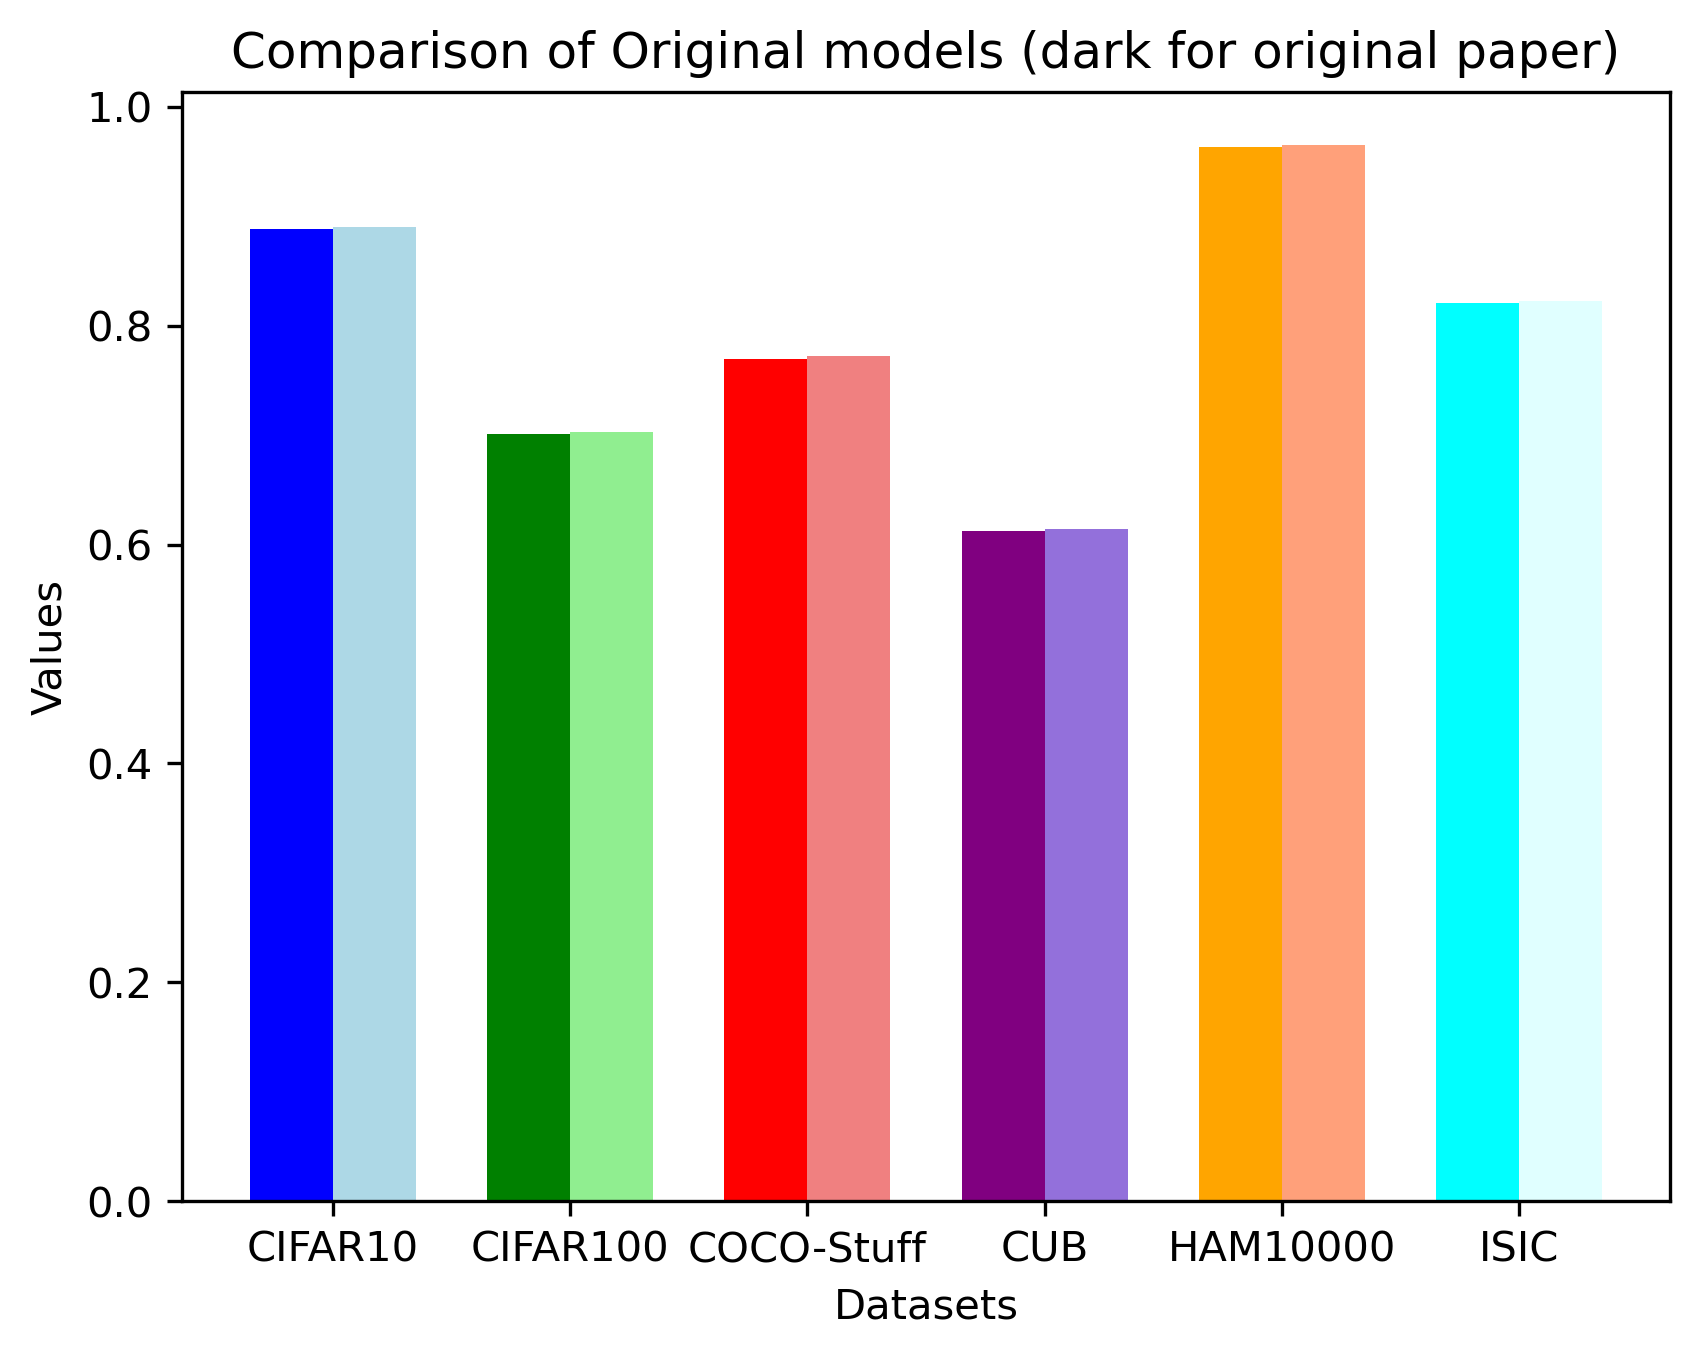

<Figure size 1920x1440 with 0 Axes>

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def plot_double_bar(data1, data2, labels, colors1, colors2, title):
    # Create index for the x-axis locations of the bars
    x = np.arange(len(labels))
    width = 0.35  # Width of the bars

    # Create subplots
    fig, ax = plt.subplots(dpi=300)

    
    # Plot bars for data1 with specified colors
    ax.bar(x - width/2, data1, width, label='Data 1', color=colors1)

    # Plot bars for data2 with specified colors
    ax.bar(x + width/2, data2, width, label='Data 2', color=colors2)

    # Set labels, title, and legend
    ax.set_xlabel('Datasets')
    ax.set_ylabel('Values')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    # ax.legend()
  
    # Show the plot
    plt.figure(dpi=300)
    plt.tight_layout()
    plt.show()

# Example usage:
original_model_table1 = np.array([0.888, 0.701, 0.770, 0.612, 0.963, 0.821]) 
original_model_table2 = np.array([0.890, 0.703, 0.772, 0.614, 0.965, 0.823])
labels = ['CIFAR10', 'CIFAR100', 'COCO-Stuff', 'CUB', 'HAM10000', 'ISIC']
colors1 = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
colors2 = ['lightblue', 'lightgreen', 'lightcoral', 'mediumpurple', 'lightsalmon', 'lightcyan']
title = 'Comparison of Original models (dark for original paper)'

plot_double_bar(original_model_table1, original_model_table2, labels, colors1, colors2, title)


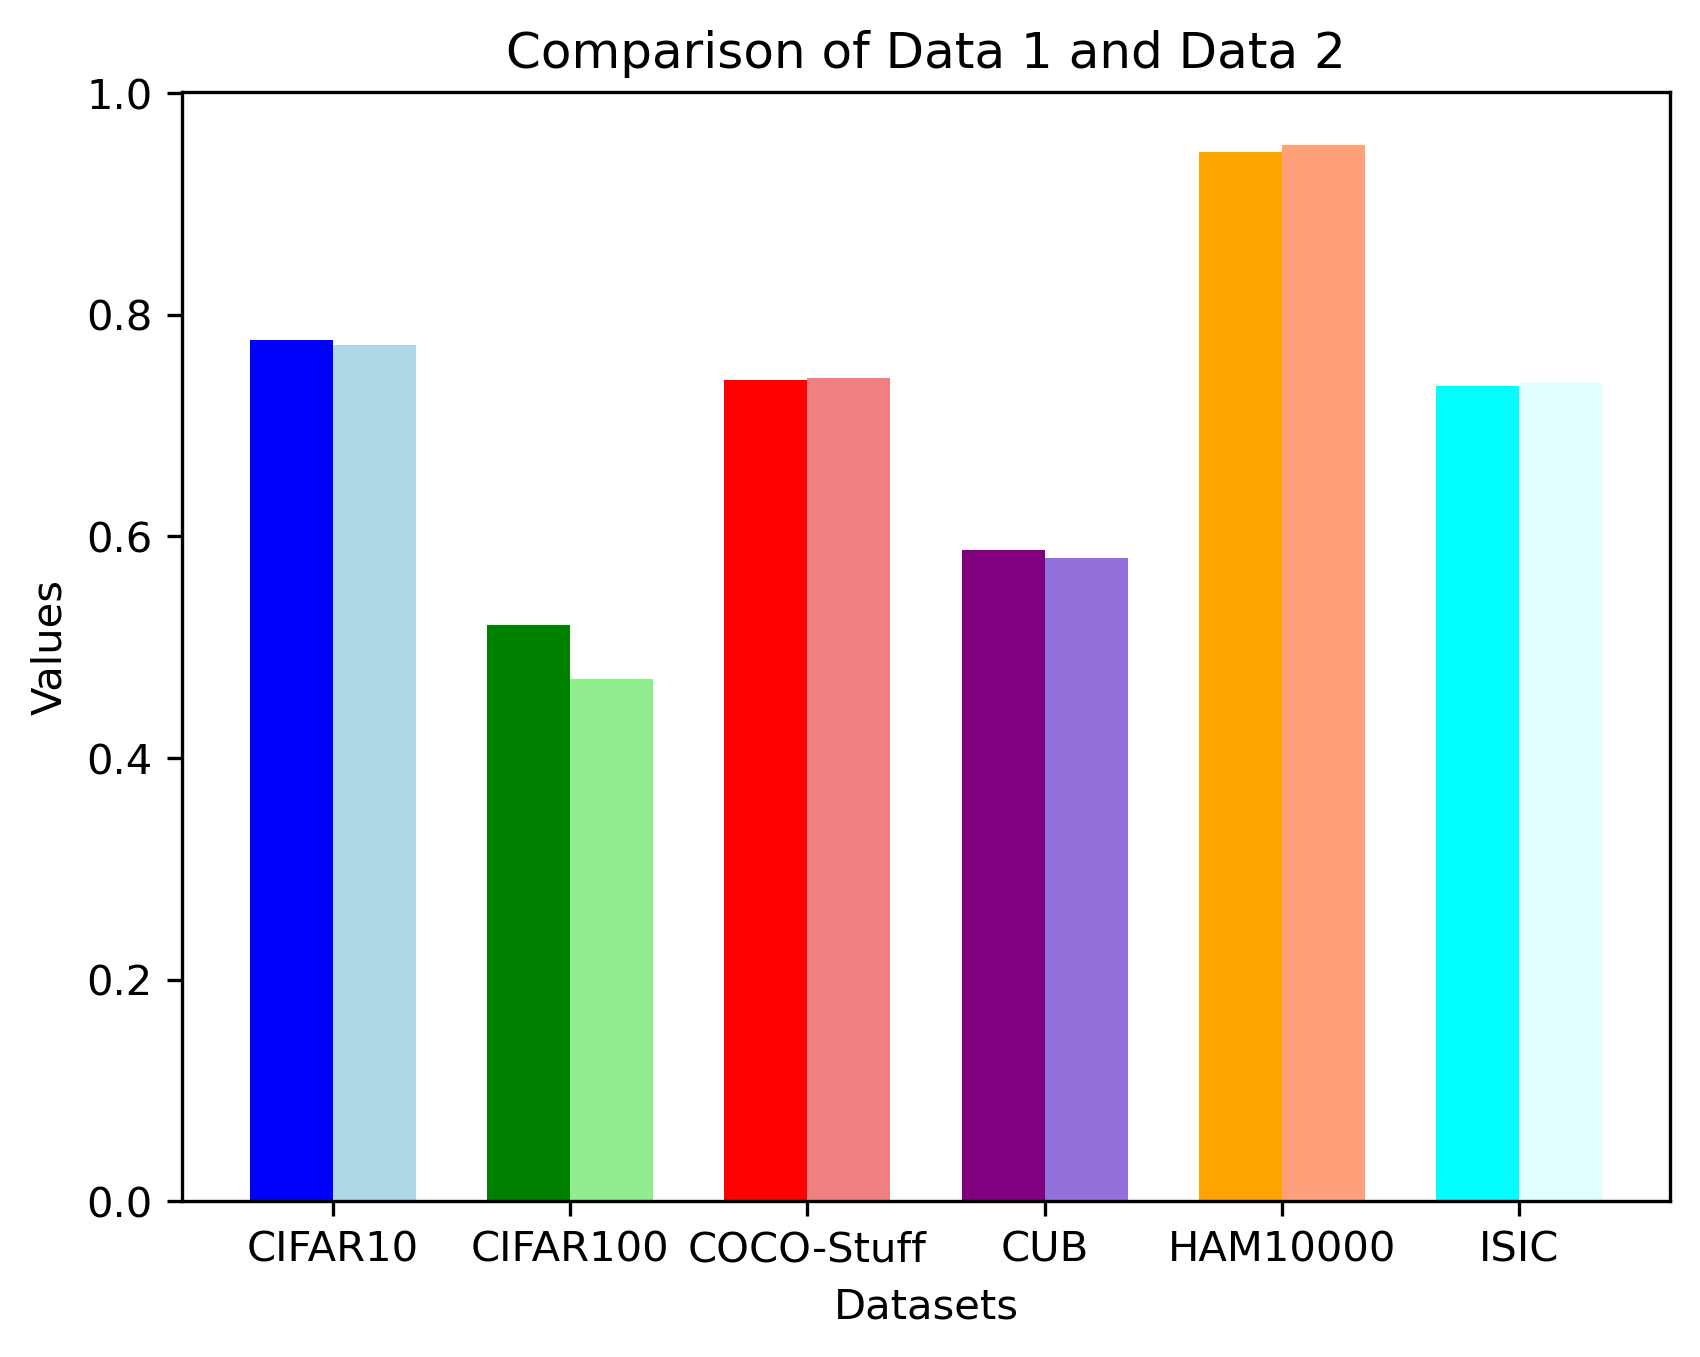

<Figure size 1920x1440 with 0 Axes>

In [32]:

original_model_table1 = np.array([0.777, 0.520, 0.741, 0.588, 0.947, 0.736])
original_model_table2 = np.array([0.773, 0.471, 0.743, 0.580, 0.953, 0.738]) 
labels = ['CIFAR10', 'CIFAR100', 'COCO-Stuff', 'CUB', 'HAM10000', 'ISIC']
colors1 = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
colors2 = ['lightblue', 'lightgreen', 'lightcoral', 'mediumpurple', 'lightsalmon', 'lightcyan']
title = 'Comparison of PCBM models (dark for original paper)'
plot_double_bar(original_model_table1, original_model_table2, labels, colors1, colors2, title)


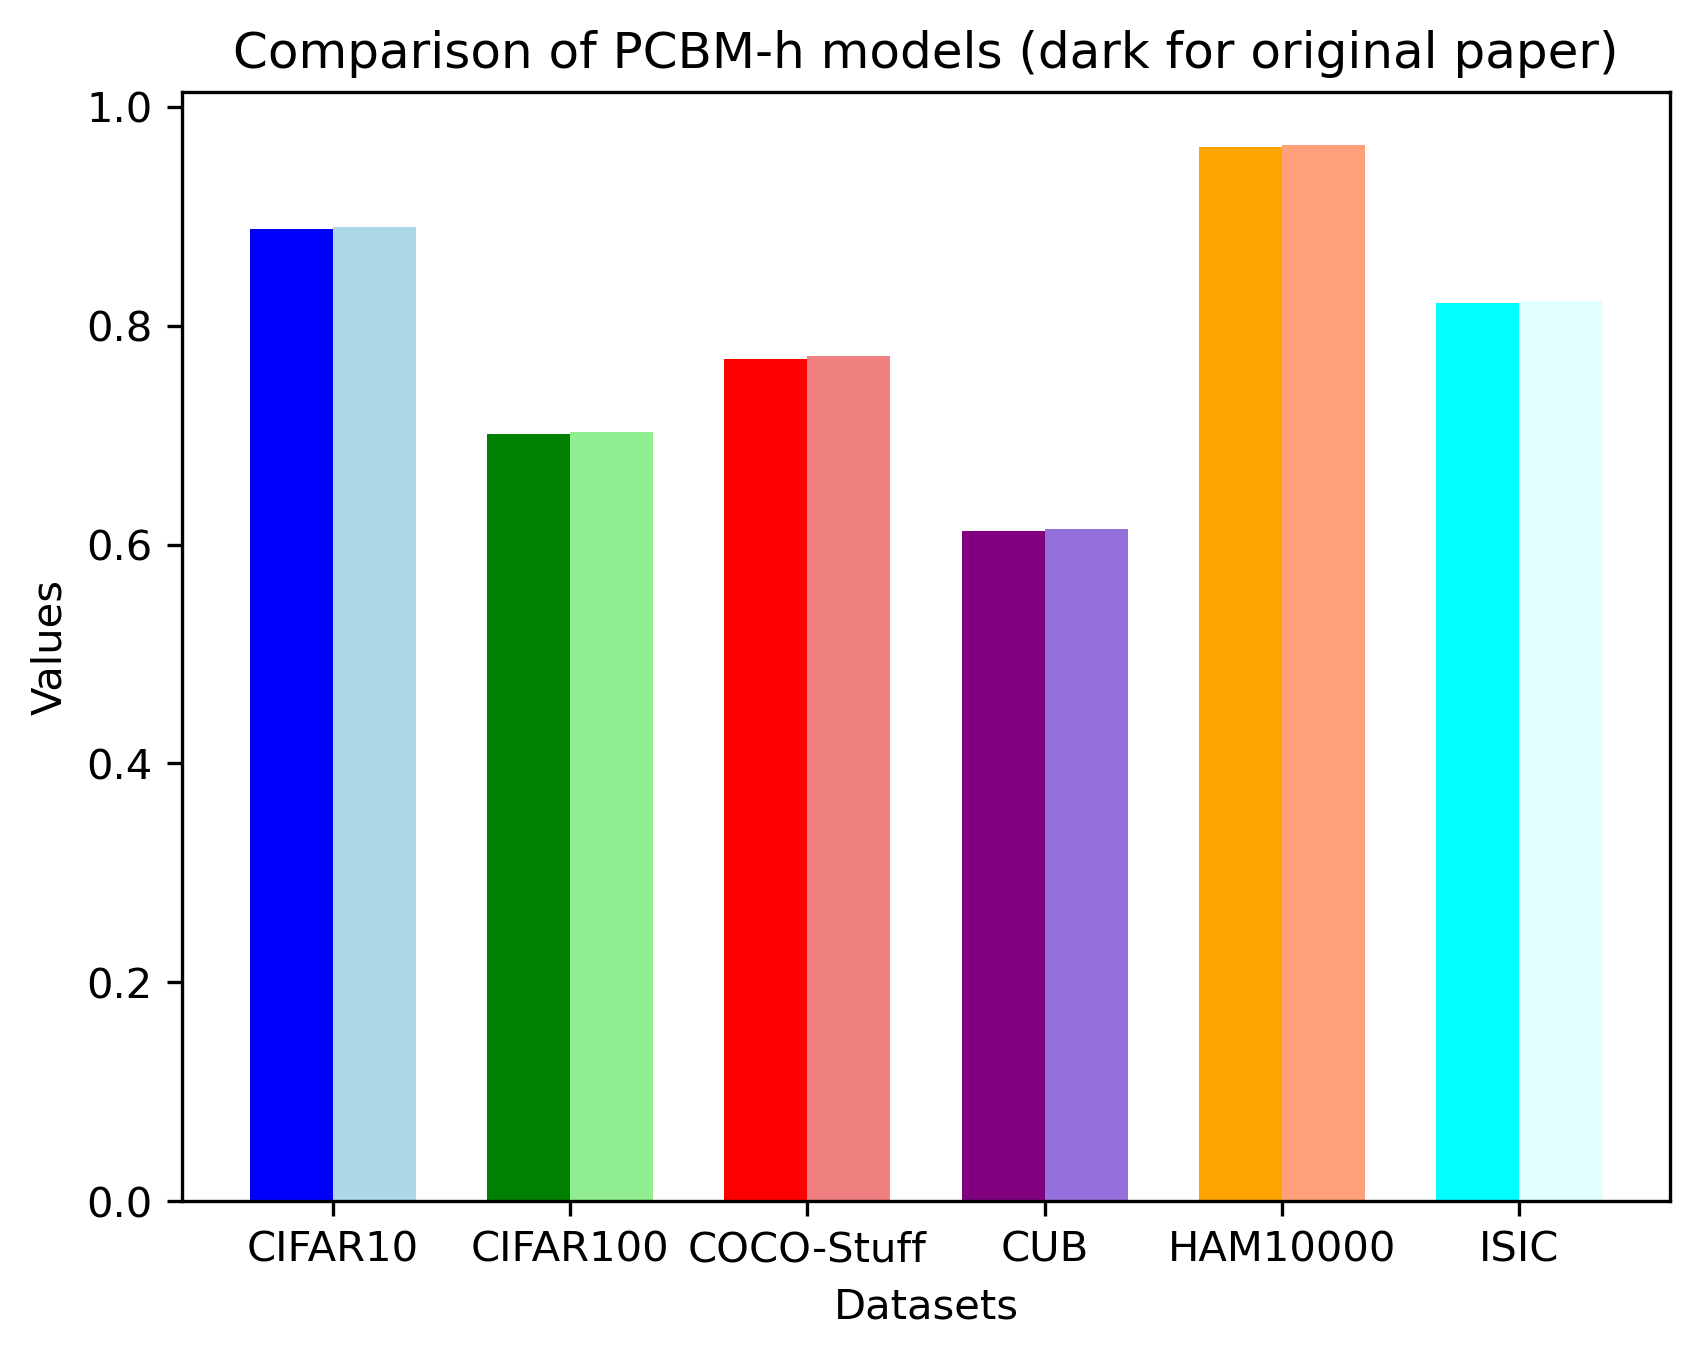

<Figure size 1920x1440 with 0 Axes>

In [37]:
# Data from Table 1 (PCBM-h)
pcbm_h_table1 = np.array([0.871, 0.680, 0.768, 0.610, 0.962, 0.801]) 

# Data from Table 2 (PCBM-h)
pcbm_h_table2 = np.array([0.880, 0.685, 0.742, 0.587, 0.956, 0.803]) 

labels = ['CIFAR10', 'CIFAR100', 'COCO-Stuff', 'CUB', 'HAM10000', 'ISIC']
colors1 = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
colors2 = ['lightblue', 'lightgreen', 'lightcoral', 'mediumpurple', 'lightsalmon', 'lightcyan']
title = 'Comparison of PCBM-h models (dark for original paper)'
plot_double_bar(original_model_table1, original_model_table2, labels, colors1, colors2, title)


## Reproducability
- table 2

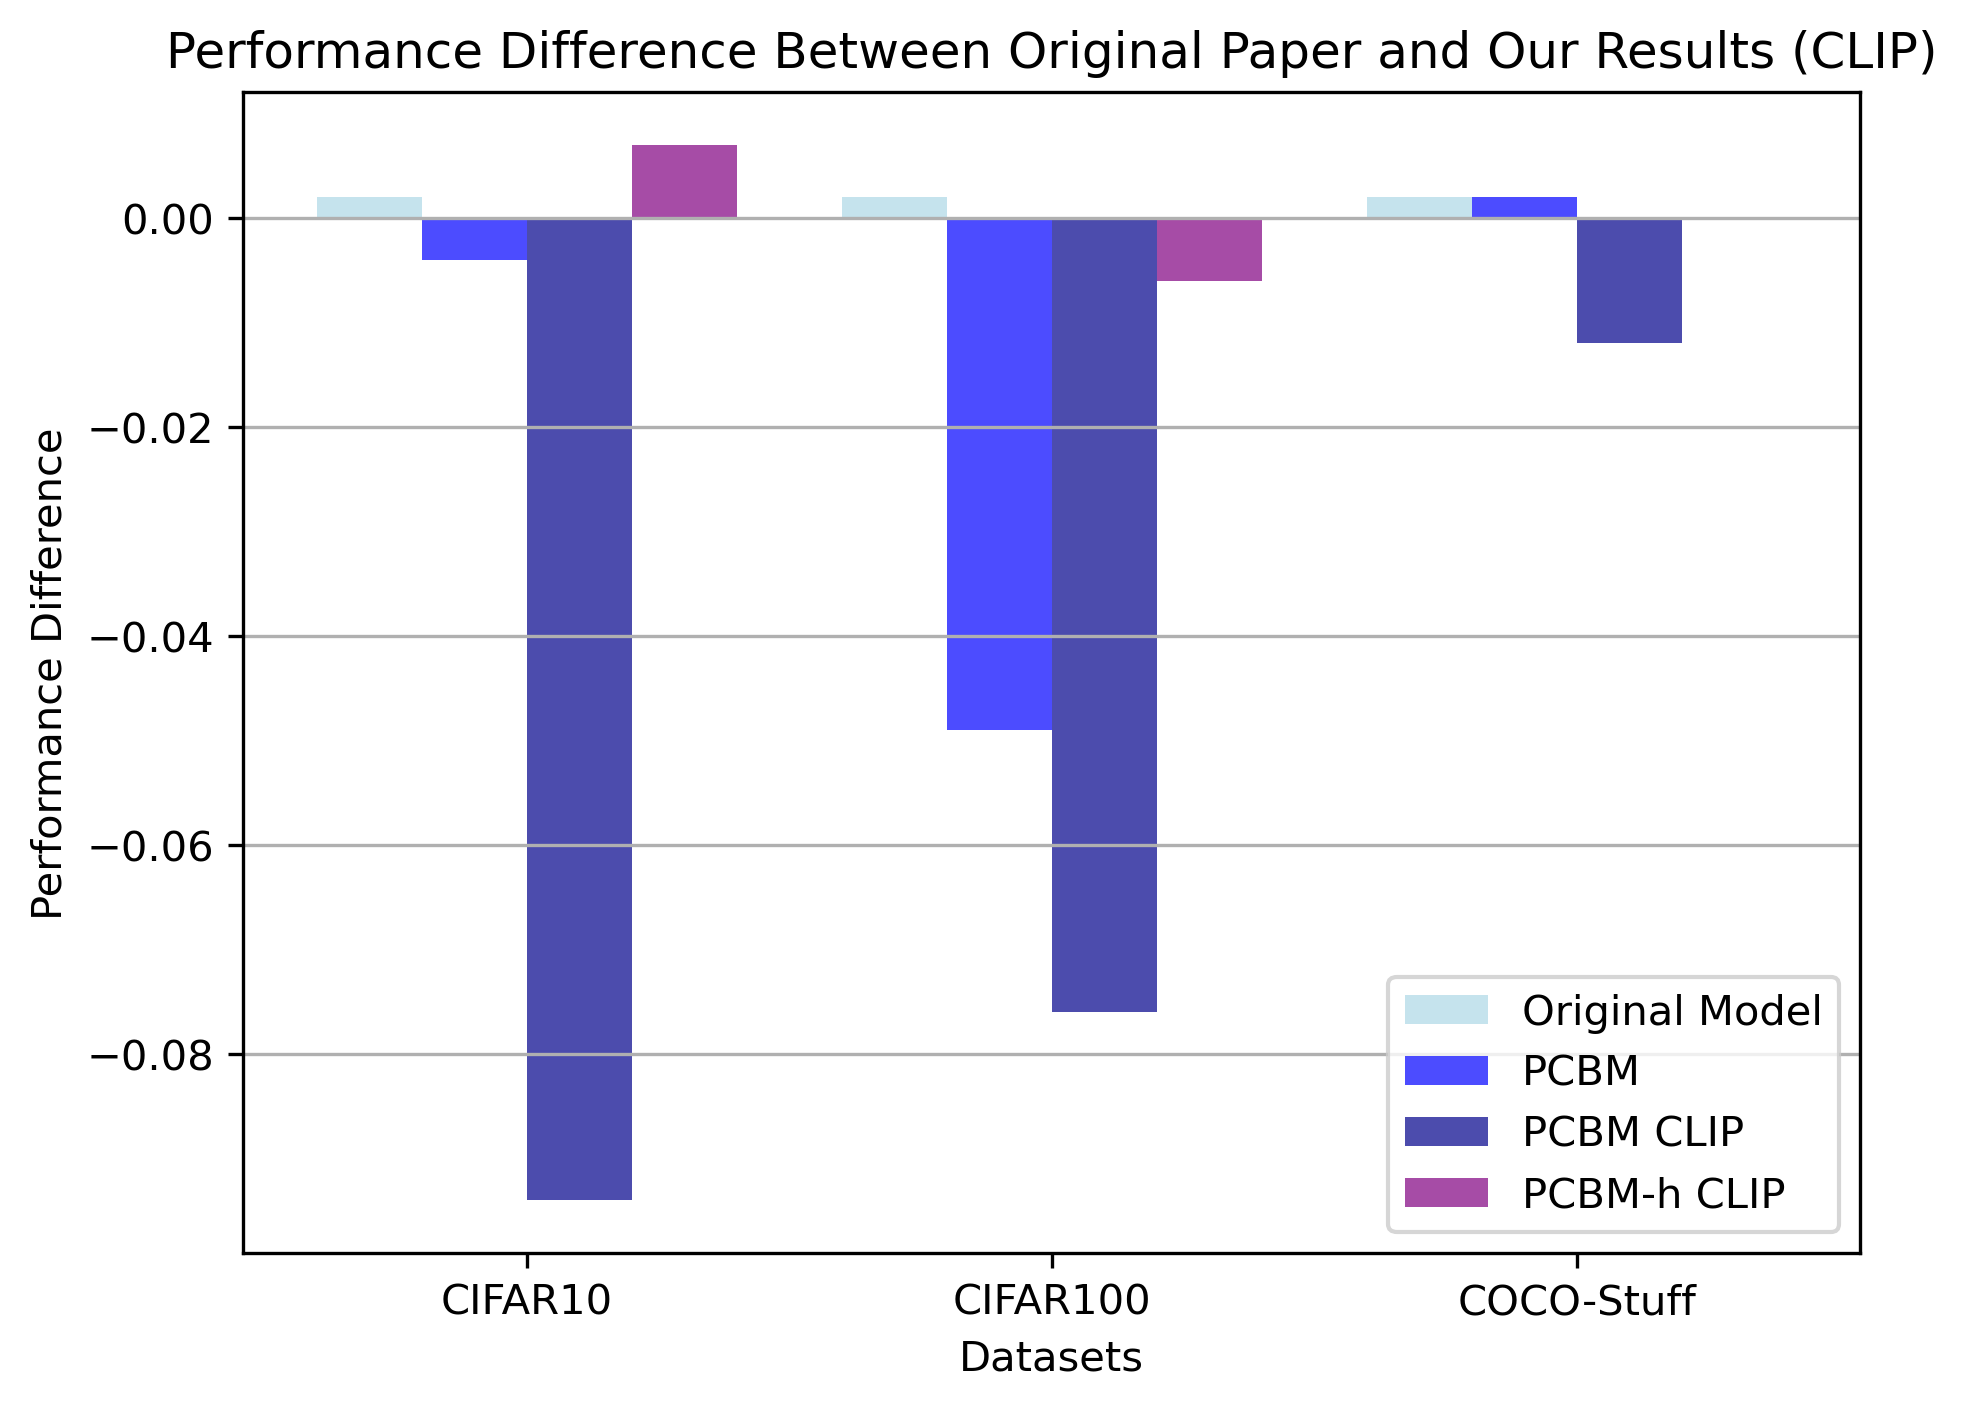

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance_difference():
    # Data from Table 1 (Original Model)
    original_model_table1 = np.array([0.890, 0.703, 0.772]) 

    # Data from Table 2 (Original Model)
    original_model_table2 = np.array([0.888, 0.701, 0.770])

    # Data from Table 1 (PCBM)
    pcbm_table1 = np.array([0.773, 0.471, 0.743]) 

    # Data from Table 2 (PCBM)
    pcbm_table2 = np.array([0.777, 0.520, 0.741]) 

    # Data from Table 1 (PCBM)
    pcbm_table1_c = np.array([0.739, 0.524, 0.743])

    # Data from Table 2 (PCBM)
    pcbm_table2_c = np.array([0.833, 0.600, 0.755]) 

    # Data from Table 1 (PCBM-h)
    pcbm_h_table1_c = np.array([0.881, 0.685, 0.769]) 

    # Data from Table 2 (PCBM-h)
    pcbm_h_table2_c = np.array([0.874, 0.691, 0.769]) 

    # Dataset labels
    datasets = ['CIFAR10', 'CIFAR100', 'COCO-Stuff']

    # Bar width
    bar_width = 0.2

    # X-axis values for the bars
    x = np.arange(len(datasets))

    # Increase DPI to 300
    plt.figure(dpi=300)

    # Plot the performance difference for the Original Model
    plt.bar(x - 1.5 * bar_width, original_model_table1 - original_model_table2, width=bar_width, label='Original Model', color='lightblue', alpha=0.7)

    # Plot the performance difference for PCBM
    plt.bar(x - 0.5 * bar_width, pcbm_table1 - pcbm_table2, width=bar_width, label='PCBM', color='blue', alpha=0.7)

    # Plot the performance difference for PCBM with CLIP concepts
    plt.bar(x + 0.5 * bar_width, pcbm_table1_c - pcbm_table2_c, width=bar_width, label='PCBM CLIP', color='darkblue', alpha=0.7)

    # Plot the performance difference for PCBM-h with CLIP concepts
    plt.bar(x + 1.5 * bar_width, pcbm_h_table1_c - pcbm_h_table2_c, width=bar_width, label='PCBM-h CLIP', color='purple', alpha=0.7)

    # Set labels and title
    plt.xlabel('Datasets')
    plt.ylabel('Performance Difference')
    plt.title('Performance Difference Between Original Paper and Our Results (CLIP)')
    plt.xticks(x, datasets)
    plt.legend()
    plt.grid(axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function to generate the plot
plot_performance_difference()


In [2]:
import numpy as np
import scipy.stats as stats

# Define the data from Table 1 (tab1original) and Table 3 (tab3)
table1_data = np.array([
    [0.888, 0.701, 0.770],
    [0.777, 0.520, 0.741],
    [0.833, 0.600, 0.755],
    [0.874, 0.691, 0.769]
])

table3_data = np.array([
    [0.890, 0.703, 0.772],
    [0.773, 0.471, 0.743],
    [0.739, 0.524, 0.743],
    [0.881, 0.685, 0.769]
])

# Number of rows (models) and columns (datasets)
num_rows, num_cols = table1_data.shape

# Initialize lists to store t-statistics and p-values
t_statistics = []
p_values = []

# Perform paired t-tests for each row (model)
for row in range(num_rows):
    t_stat, p_value = stats.ttest_rel(table1_data[row], table3_data[row])
    t_statistics.append(t_stat)
    p_values.append(p_value)

# Print the results
for row in range(num_rows):
    print(f"Model {row+1}:")
    print(f"  t-statistic: {t_statistics[row]}")
    print(f"  p-value: {p_values[row]}")
    if p_values[row] < 0.05:
        print("  There is a significant difference.")
    else:
        print("  There is no significant difference.")
    print()


Model 1:
  t-statistic: -inf
  p-value: 0.0
  There is a significant difference.

Model 2:
  t-statistic: 1.05632860220204
  p-value: 0.40157165776255155
  There is no significant difference.

Model 3:
  t-statistic: 2.438180390801808
  p-value: 0.13497942535428387
  There is no significant difference.

Model 4:
  t-statistic: -0.08873565094162196
  p-value: 0.9373775708914776
  There is no significant difference.



## New backbone models claim 1

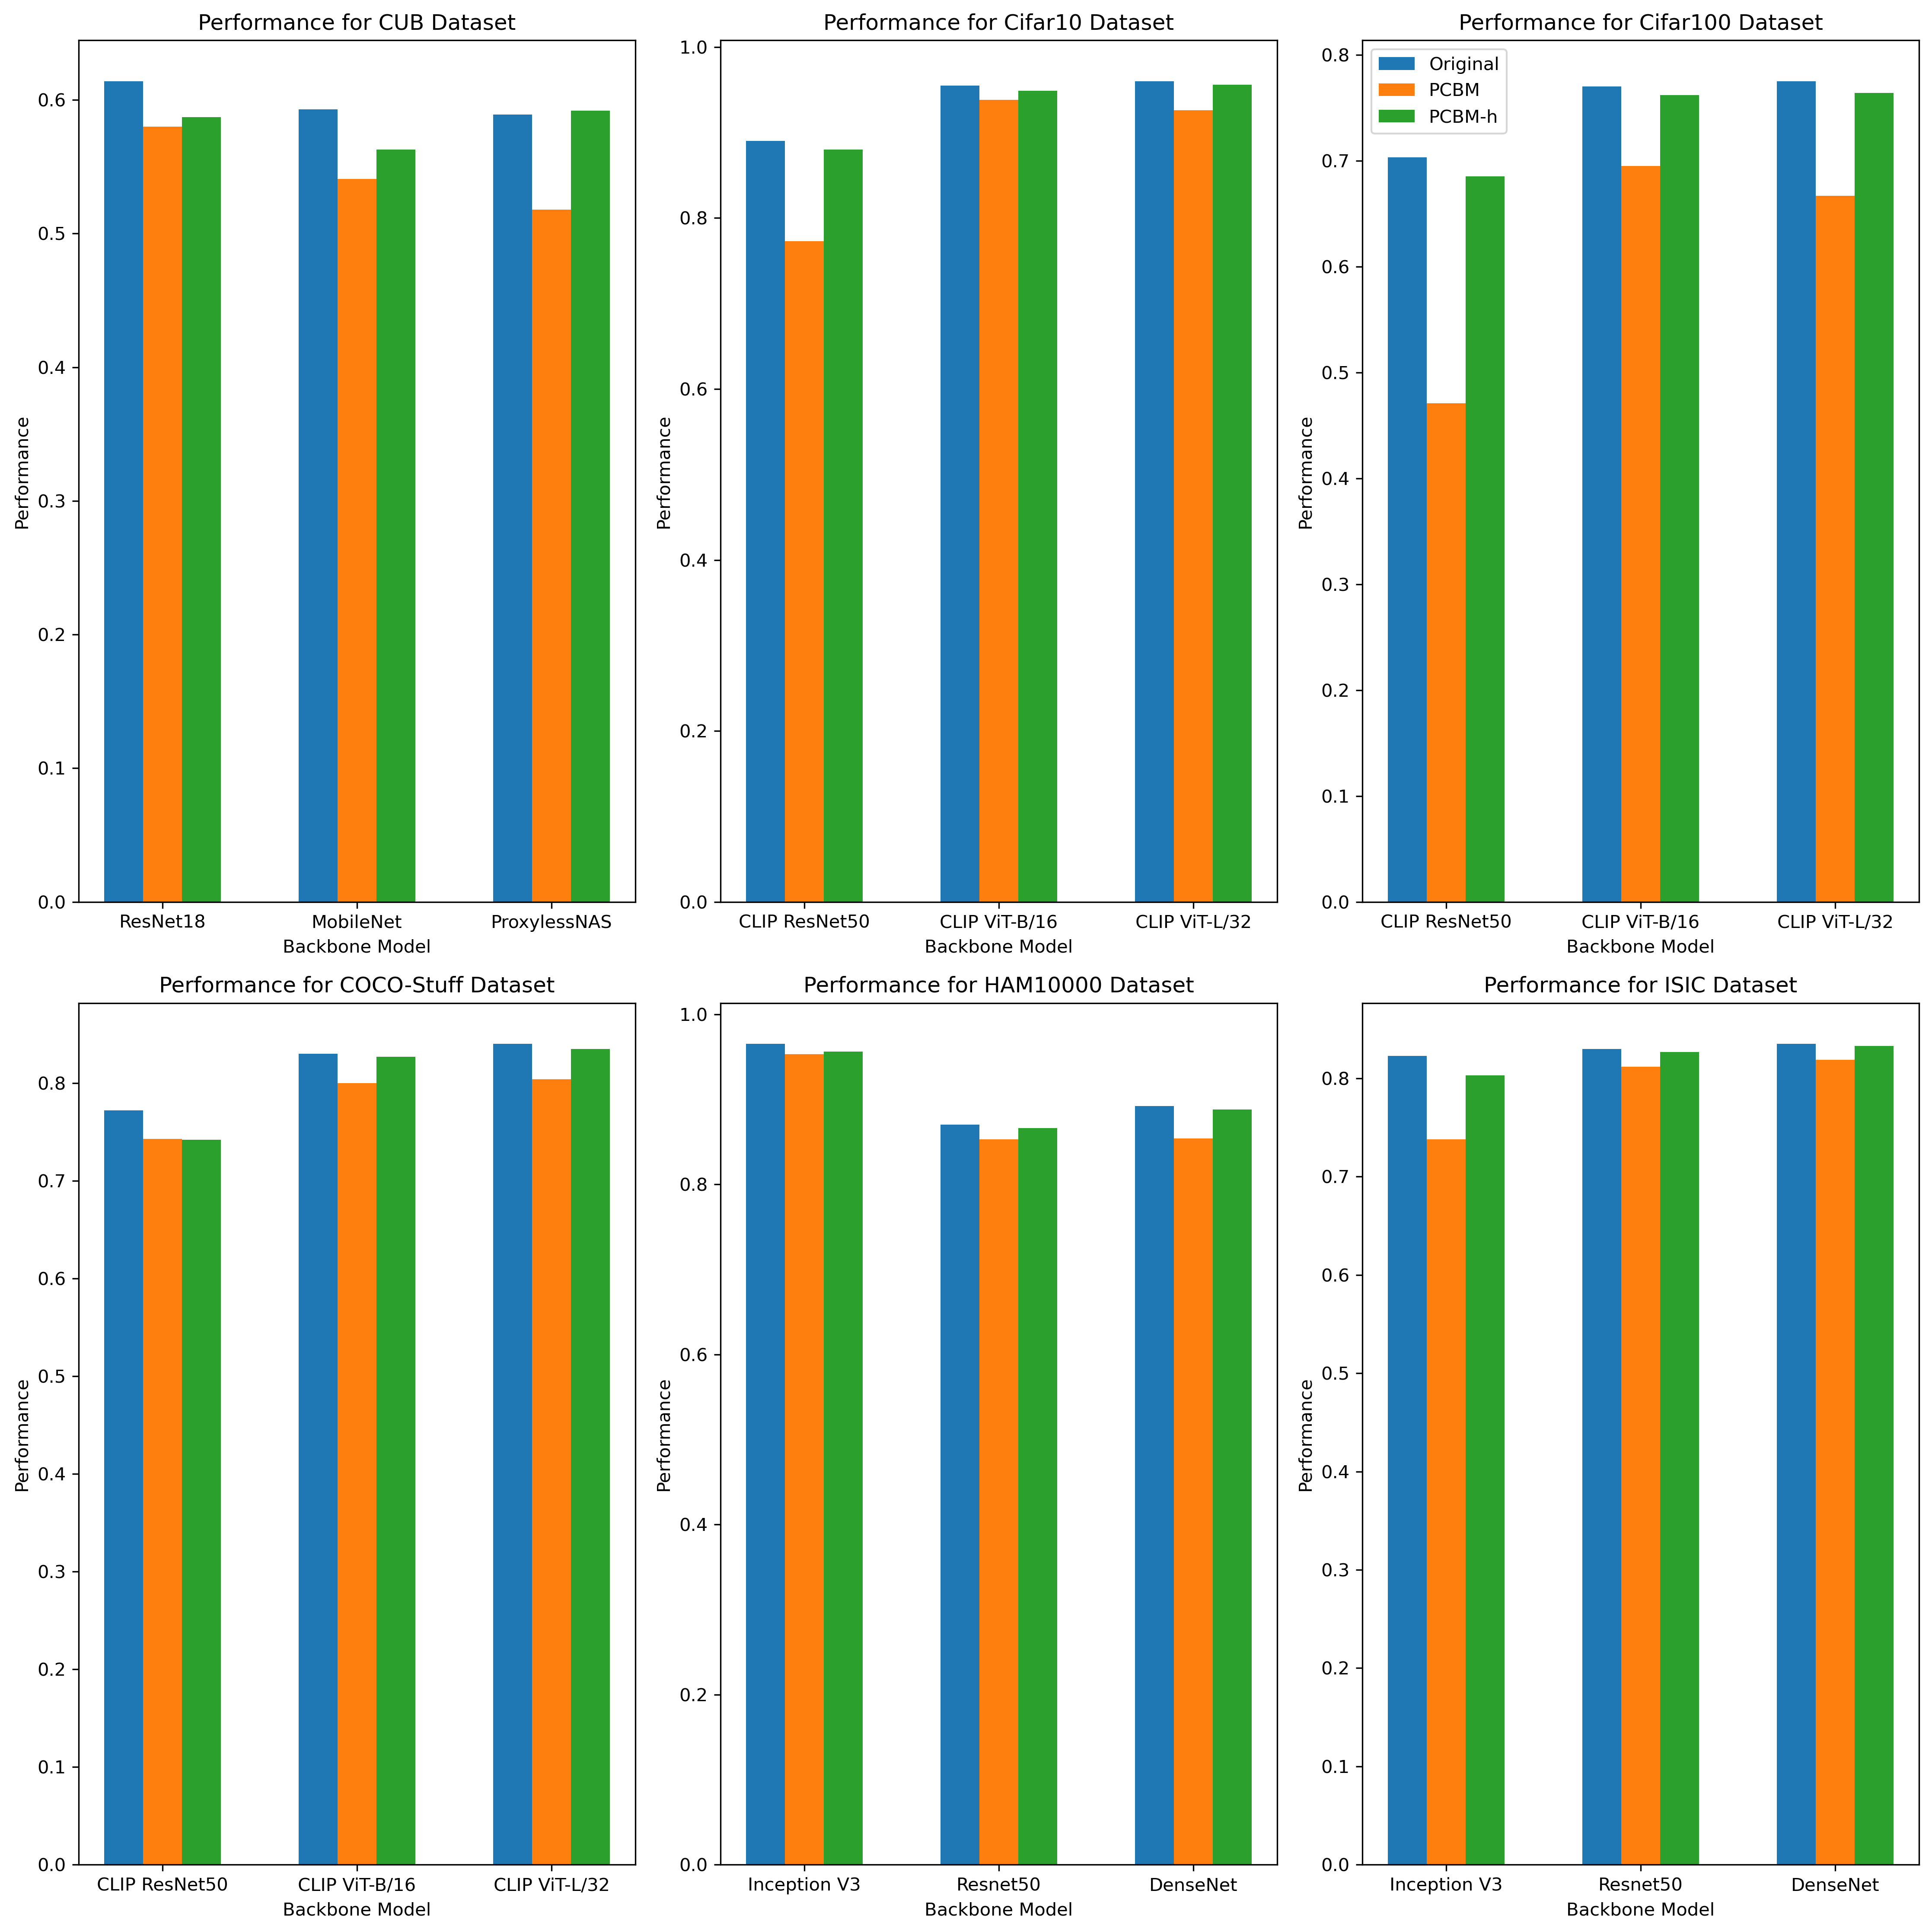

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
data = {
    "Dataset": ["CUB", "CUB", "CUB", "Cifar10", "Cifar10", "Cifar10", "Cifar100", "Cifar100", "Cifar100", 
                "COCO-Stuff", "COCO-Stuff", "COCO-Stuff", "HAM10000", "HAM10000", "HAM10000", "ISIC", "ISIC", "ISIC"],
    "Backbone Model": ["ResNet18", "MobileNet", "ProxylessNAS", 
                       "CLIP ResNet50", "CLIP ViT-B/16", "CLIP ViT-L/32", 
                       "CLIP ResNet50", "CLIP ViT-B/16", "CLIP ViT-L/32", 
                       "CLIP ResNet50", "CLIP ViT-B/16", "CLIP ViT-L/32", 
                       "Inception V3", "Resnet50", "DenseNet", 
                       "Inception V3", "Resnet50", "DenseNet"],
    "Original": [0.614, 0.593, 0.589, 0.890, 0.955, 0.960, 0.703, 0.770, 0.775, 0.772, 0.830, 0.840, 0.965, 0.870, 0.892, 0.823, 0.830, 0.835],
    "PCBM": [0.580, 0.541, 0.518, 0.773, 0.938, 0.926, 0.471, 0.695, 0.667, 0.743, 0.800, 0.804, 0.953, 0.853, 0.854, 0.738, 0.812, 0.819],
    "PCBM-h": [0.587, 0.563, 0.592, 0.880, 0.949, 0.956, 0.685, 0.762, 0.764, 0.742, 0.827, 0.835, 0.956, 0.866, 0.888, 0.803, 0.827, 0.833]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Unique datasets
datasets = df['Dataset'].unique()

# Width of a bar 
width = 0.2

# Color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Creating a figure for the subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 15), dpi=300)

# Flatten the array of axes
axs = axs.flatten()

# Loop through each dataset and plot in a subplot
for i, dataset in enumerate(datasets):
    # Subset of the DataFrame for the current dataset
    subset = df[df['Dataset'] == dataset]

    # Number of backbone models in this dataset
    n_models = len(subset)

    # Preparing the x-axis for the grouped bar chart
    x = np.arange(n_models)

    # Plotting bars for each model
    axs[i].bar(x - width, subset['Original'], width, label='Original', color=colors[0])
    axs[i].bar(x, subset['PCBM'], width, label='PCBM', color=colors[1])
    axs[i].bar(x + width, subset['PCBM-h'], width, label='PCBM-h', color=colors[2])

    # Adding backbone model names on the x-axis
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(subset['Backbone Model'])

    # Adding labels and title
    axs[i].set_xlabel('Backbone Model')
    axs[i].set_ylabel('Performance')
    axs[i].set_title(f'Performance for {dataset} Dataset')

    # Adding a legend
    if i == 2:
        axs[i].legend(loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt.show()


## NLP Extension